In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Importing the Dataset
df = pd.read_csv('TSLA.csv')

In [3]:
# First 5 rows of the dataset:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
# Last 5 rows of the dataset:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [11]:
# Checking the concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [6]:
# Displaying the statistical measures of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [14]:
df.shape

(2416, 7)

In [10]:
df.drop('Date',axis=1).corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


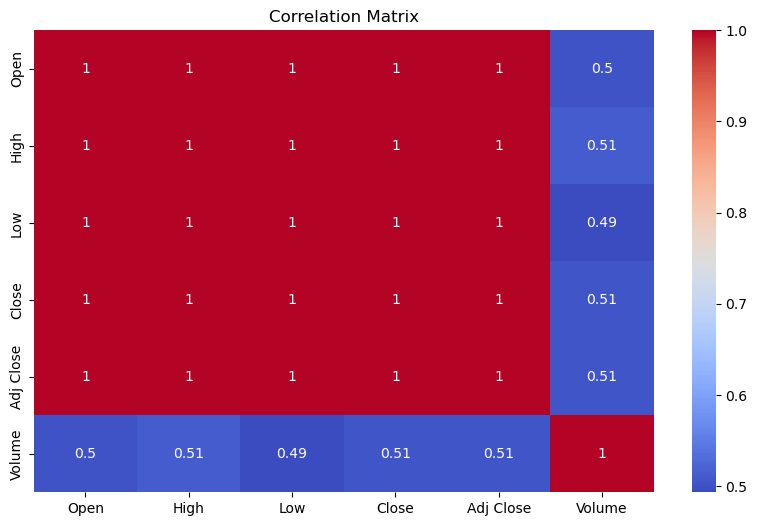

In [9]:
# Checking for colinearity
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('Date',axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

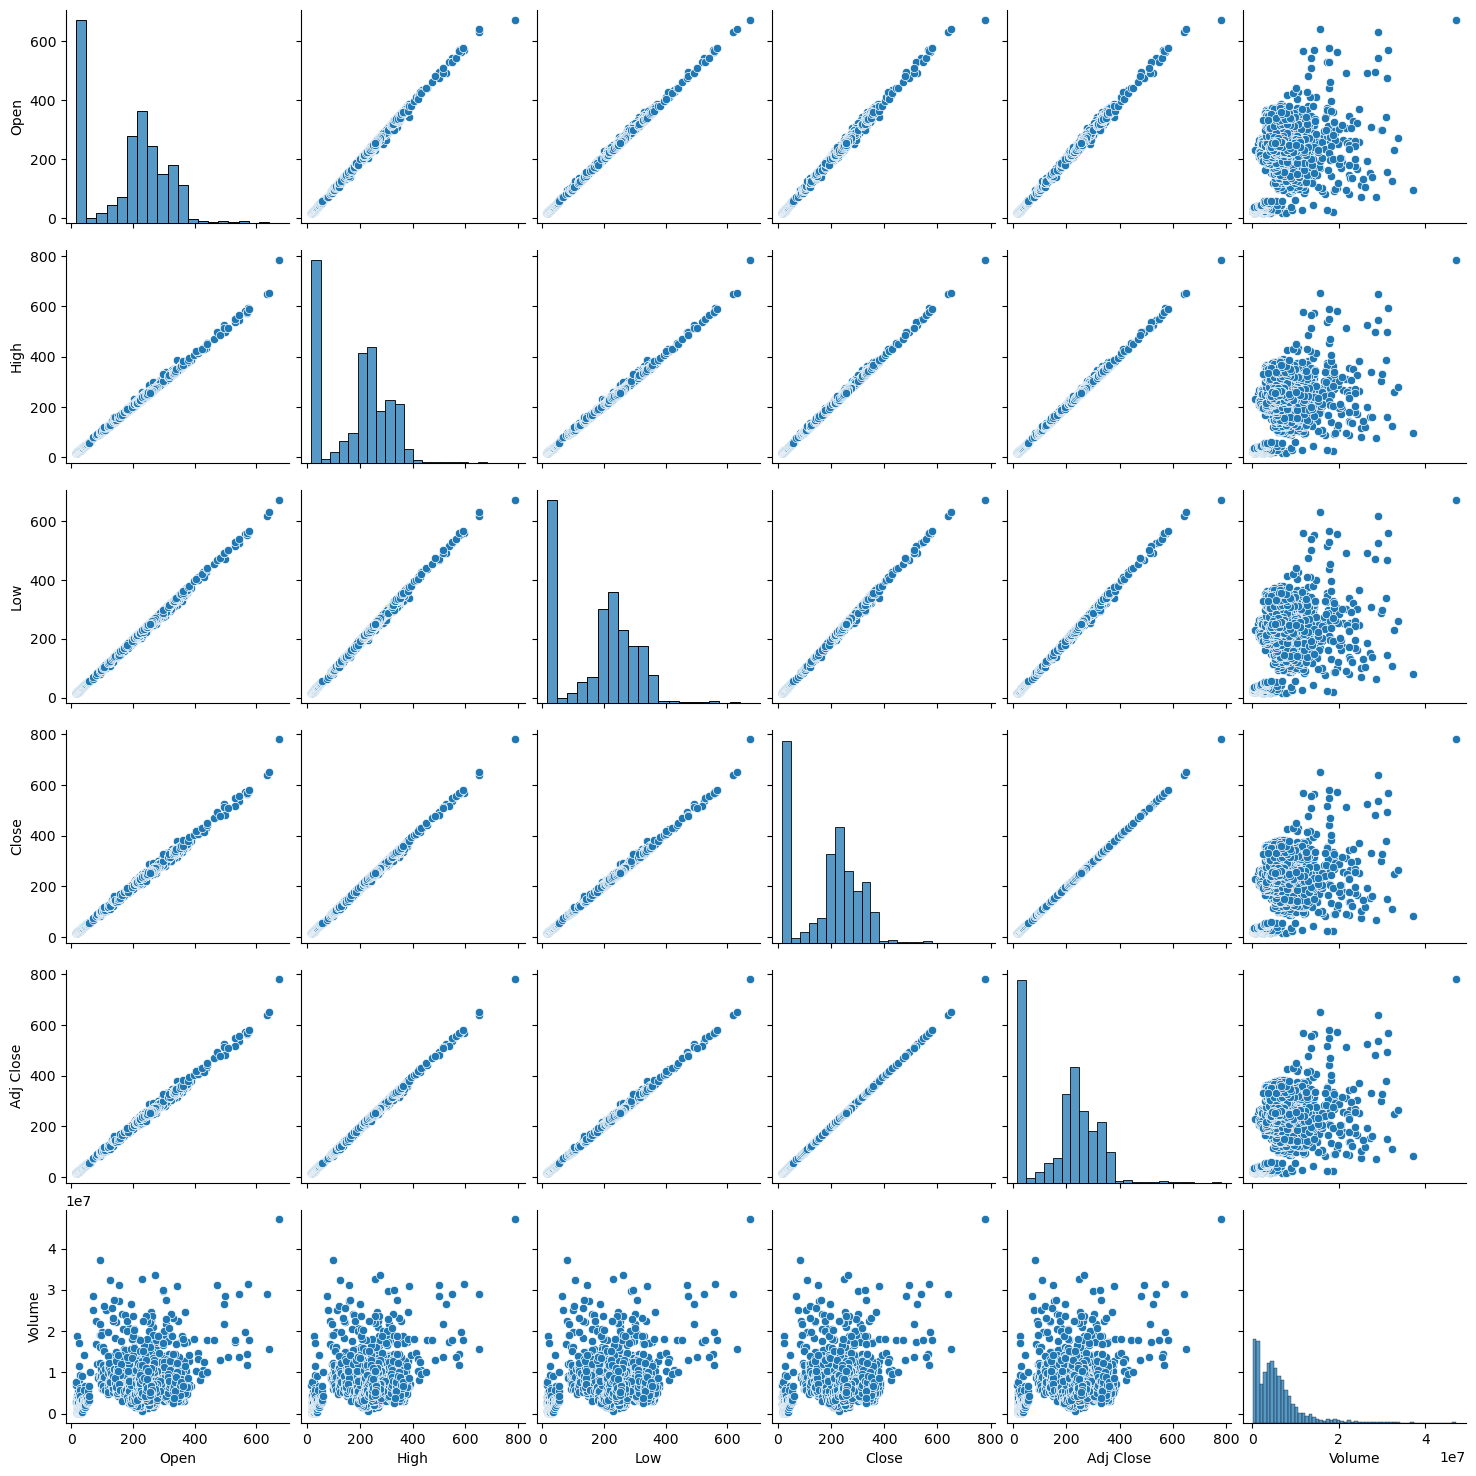

In [31]:
# Pairplot to visualize relationships between variables
plt.figure(figsize=(10,6))
sns.pairplot(df.drop('Date',axis=1))
plt.show()

Finding -> from the above pairplot we can see that there is a strong positive correlation between the features.

# Data Cleaning

In [12]:
# Making a copy of the original dataset
df1 = df.copy() # We will be using this copy for Data Cleaning and Feature Engineering

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [15]:
# First of let's check for missing values:
df1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Findin -> No Null values were Found in the entire dataset.

In [19]:
# Checking For duplicates:
print("Number of duplicate rows:", df1.duplicated().sum())
print("Duplicate rows:")
print(df1[df1.duplicated()])

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


Finding -> No Duplicated records found in the entire dataset.

### Handling Date Column

In [20]:
# Changing the 'Date' column to datetime format:
print("Data type before conversion:", df1['Date'].dtype)
# Converting to datetime format:
df1['Date'] = df1['Date'].astype('datetime64[ns]')
print("Data type after conversion:", df1['Date'].dtype)

Data type before conversion: object
Data type after conversion: datetime64[ns]


In [32]:
# Performing Feature Engineering on the 'Date' column:
df1['Day'] = df1['Date'].dt.day
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

# Dropping the original 'Date' column as we have extracted useful features from it:
df1.drop('Date', axis=1, inplace=True)
df1.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300,29,6,2010
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100,30,6,2010
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800,1,7,2010
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2,7,2010
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900,6,7,2010


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
 6   Day        2416 non-null   int32  
 7   Month      2416 non-null   int32  
 8   Year       2416 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 141.7 KB


In [38]:
# Let's save the cleaned and feature engineered dataset to a new CSV file:
df1.to_csv('TSLA_Cleaned_Feature_Engineered.csv', index=False)

# Visualization

### Close Price Based On Year

C:\Users\faiza\AppData\Local\Temp\ipykernel_21444\766931737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Year', y='Close', data=df1,palette='viridis')


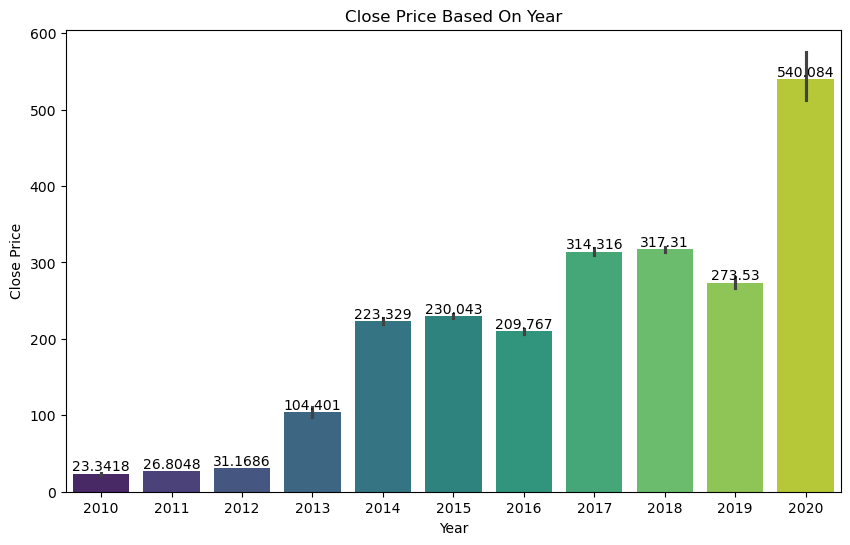

In [45]:
# Close Price Based On Year
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Year', y='Close', data=df1,palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Close Price Based On Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()

# 📌 Key Observations
1. 2010–2012: Modest Growth Phase
    - The closing price rose gradually from $23.34 in 2010 to $31.17 in 2012.
    - This period reflects early-stage stability, likely before major market recognition.
2. 2013: Breakout Year
    - A dramatic surge to $104.40, more than tripling the previous year's close.
    - Indicates a pivotal shift—possibly due to product breakthroughs, investor confidence, or broader EV market momentum.
3. 2014–2015: Continued Acceleration
    - Prices jumped to $223.33 in 2014 and $230.04 in 2015.
    - Growth slowed slightly but remained strong, suggesting consolidation after the breakout.
4. 2016: Temporary Decline
    - A dip to $209.77, marking the first pullback since 2012.
    - Could reflect market correction, operational challenges, or external factors.
5. 2017–2018: Recovery and Plateau
    - Rebounded to $314.32 in 2017 and slightly increased to $317.31 in 2018.
    - Indicates regained momentum but with signs of leveling off.
6. 2019: Moderate Decline
    - Dropped to $273.53, suggesting market hesitation or transitional phase.
7. 2020: Explosive Growth
    - Skyrocketed to $540.08, nearly doubling the previous year.
    - Likely driven by major events such as stock splits, profitability milestones, or heightened investor enthusiasm.

C:\Users\faiza\AppData\Local\Temp\ipykernel_21444\789750490.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x='Month', y='Close', data=df1,palette='viridis')


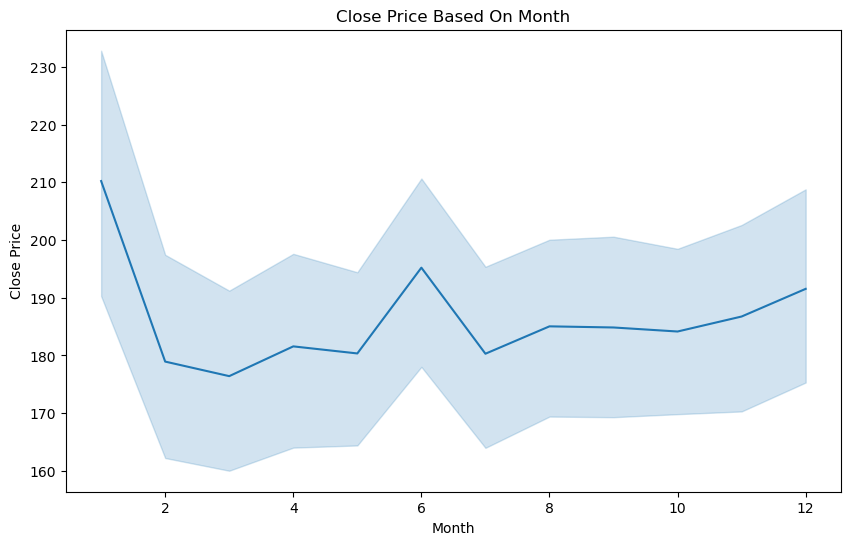

In [64]:
# Close Price Based On Month
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Month', y='Close', data=df1,palette='viridis')
plt.title('Close Price Based On Month')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.show()

# 📌 Accurate Key Observations from "Close Price Based On Month" (Line Chart)
- January (Month 1) again shows the highest close price, reinforcing the idea that the year often starts strong for TSLA.
- February (Month 2) sees a sharp drop, suggesting a recurring early-year correction or cooling-off period.
- Mid-year months (June and December) show secondary peaks, which may align with mid-year earnings reports and end-of-year investor activity.
- Months 3 to 11 display moderate fluctuations, with prices generally ranging between $176 and $186, indicating a relatively stable performance during most of the year.
- The shaded area around the line (likely a confidence interval or standard deviation) shows that January and June have higher variability, hinting at more volatile trading during those months.

C:\Users\faiza\AppData\Local\Temp\ipykernel_21444\14204428.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x='Day', y='Close', data=df1,palette='viridis')


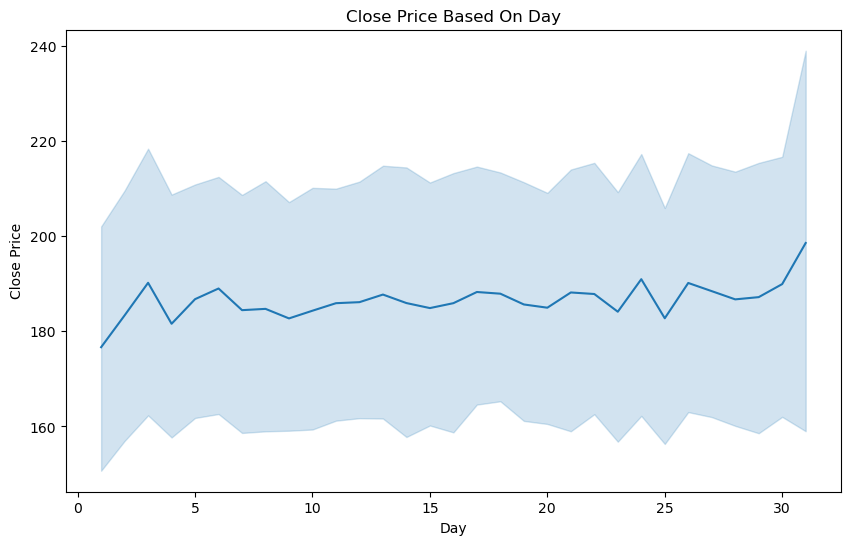

In [61]:
# Close Price Based On Day
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Day', y='Close', data=df1,palette='viridis')
plt.title('Close Price Based On Day')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.show()

# 📈 Trend Analysis
- Overall Direction: The closing price shows a general upward trend over the 30-day period, suggesting bullish momentum.
- Initial Dip: There’s a slight decline or stagnation in the early days (Day 1–5), possibly indicating market hesitation or correction.
- Mid-Period Surge: Around Day 10 to Day 20, the price rises more sharply, which could reflect positive news, earnings, or investor sentiment.
- Late Stabilization: From Day 25 onward, the price seems to plateau or rise more gradually, hinting at consolidation.